In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import iplot
import plotly as py

In [2]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [3]:
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',25)
pd.set_option('display.width',200)

In [4]:
df=pd.read_csv('parkinsons.txt')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.000070,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.000080,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.000090,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.000110,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.000080,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.000030,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.000030,0.00144,0.00182,0.00431,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.000060,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.000060,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [5]:
df.shape

(195, 24)

In [6]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [8]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

# Data Visualisation

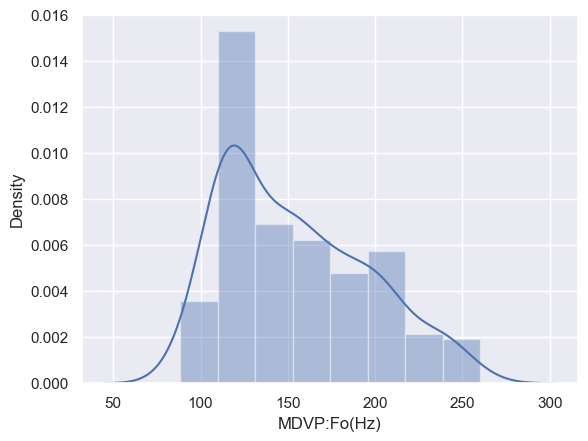

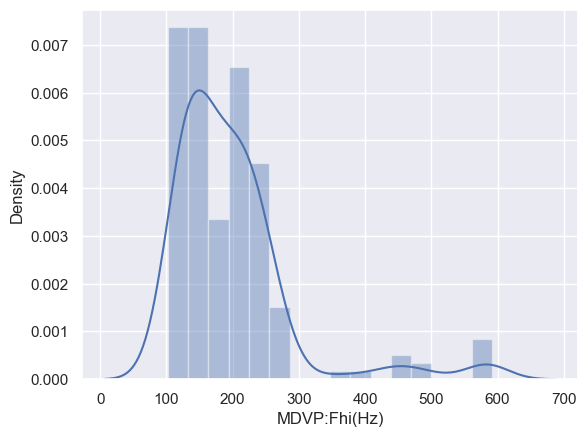

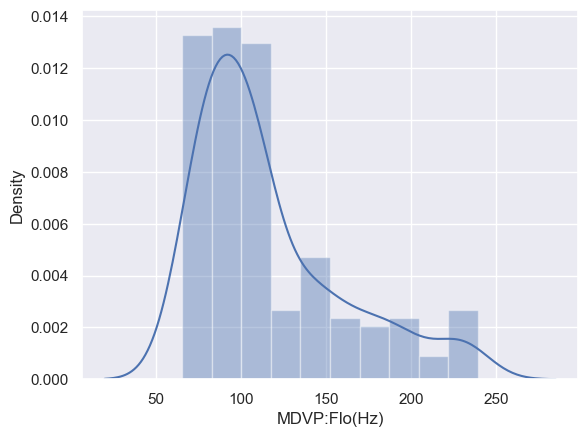

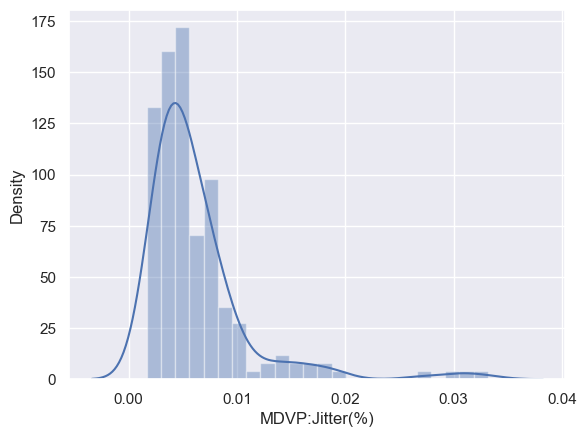

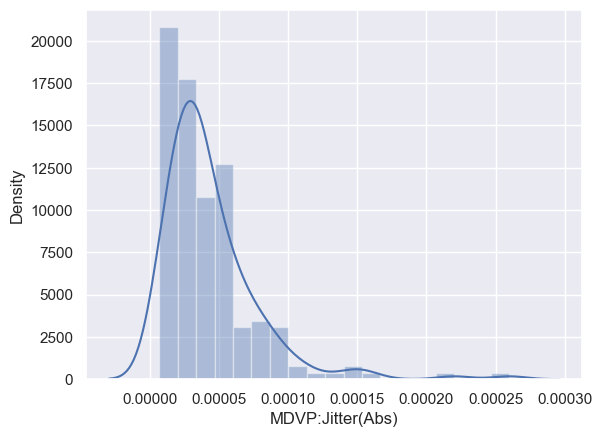

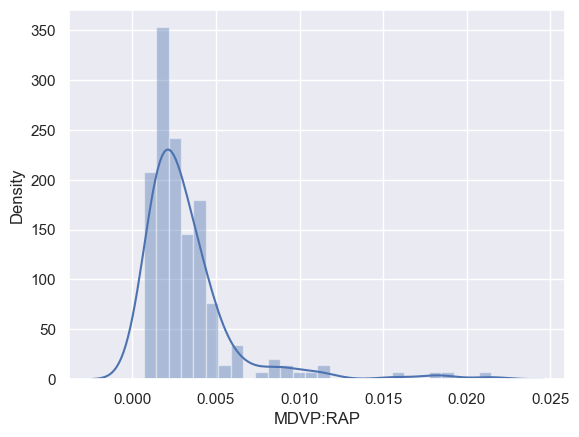

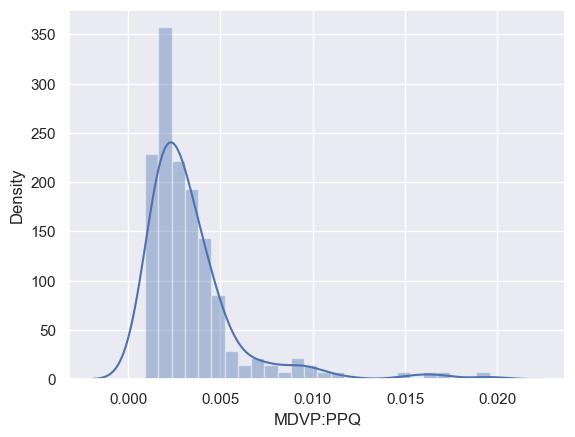

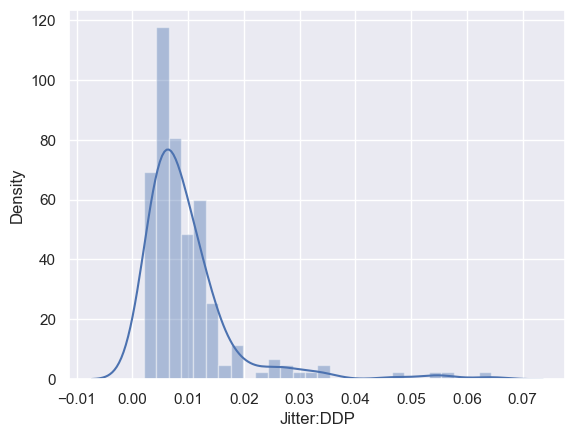

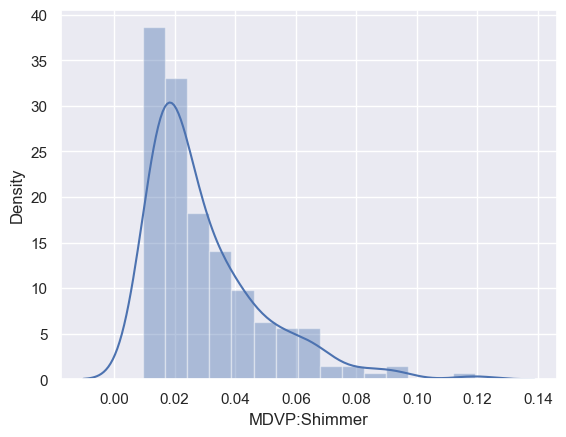

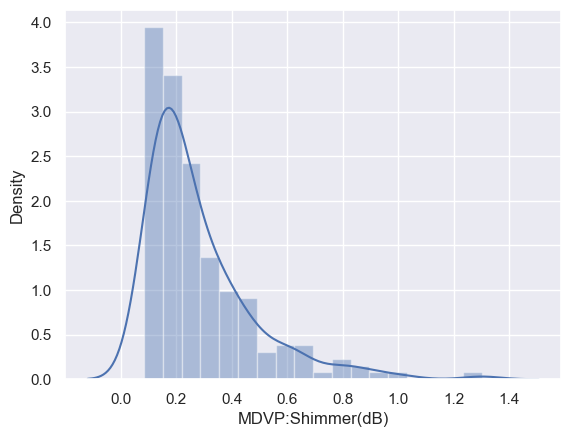

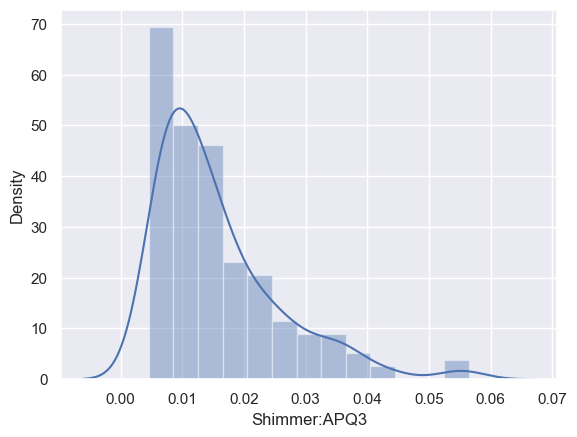

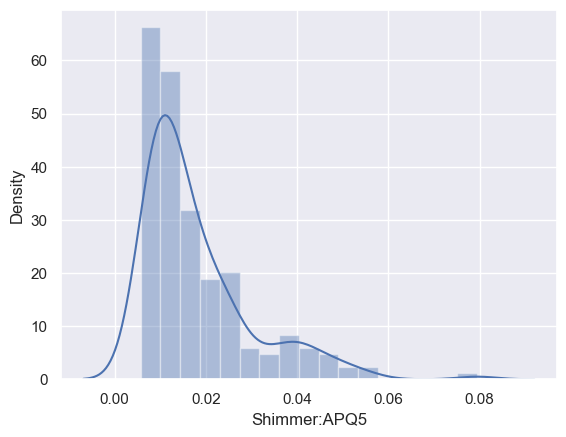

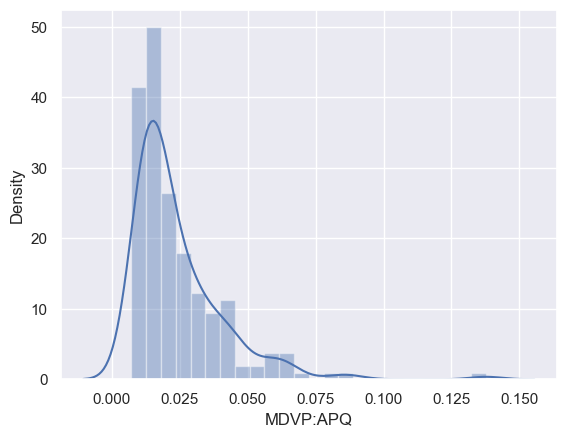

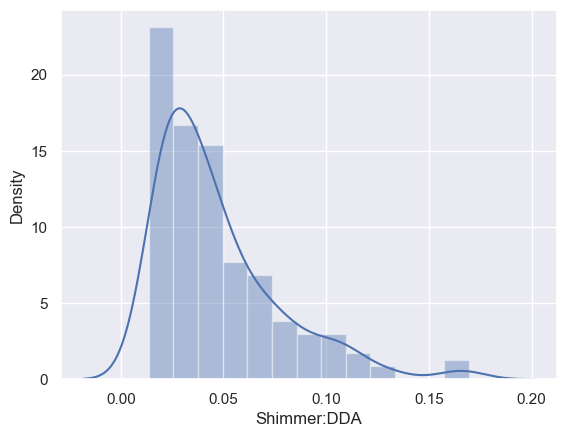

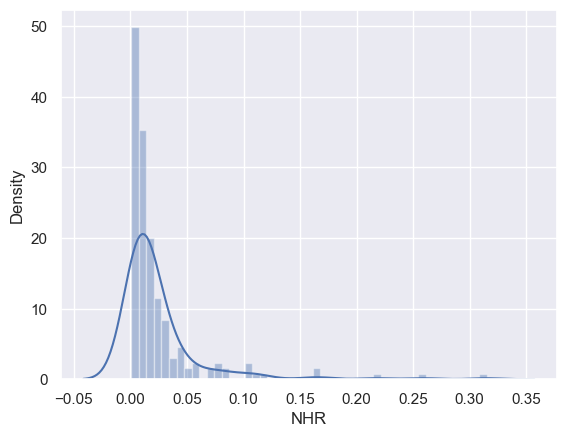

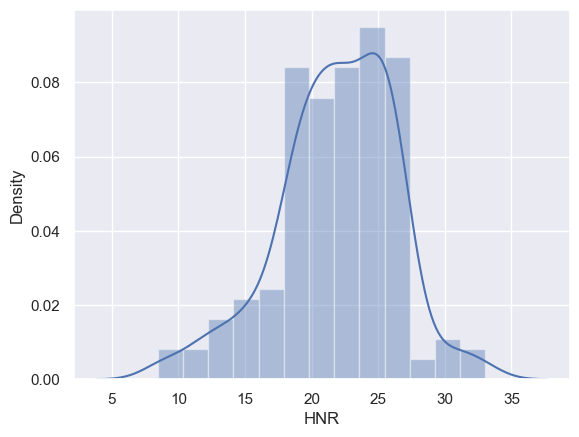

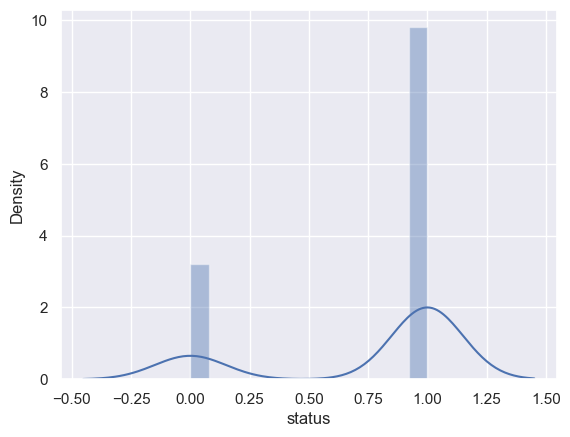

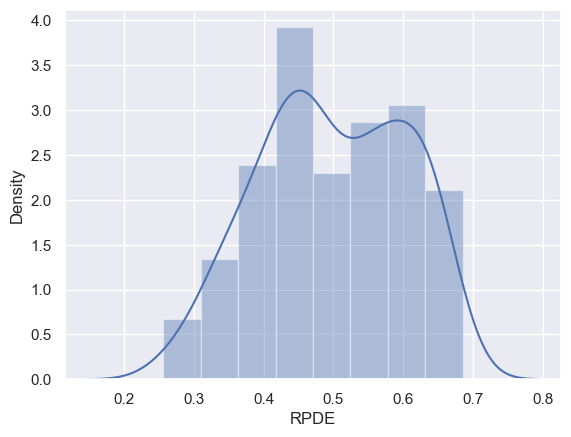

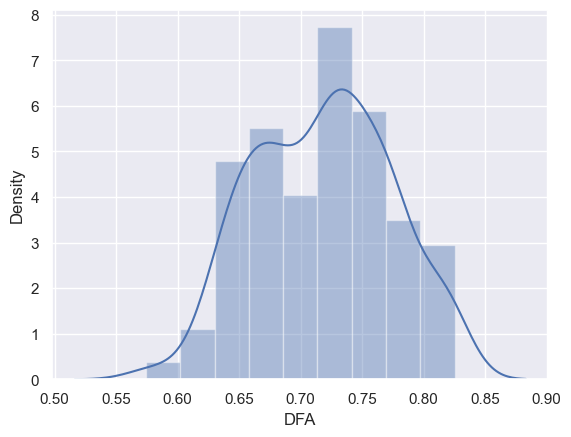

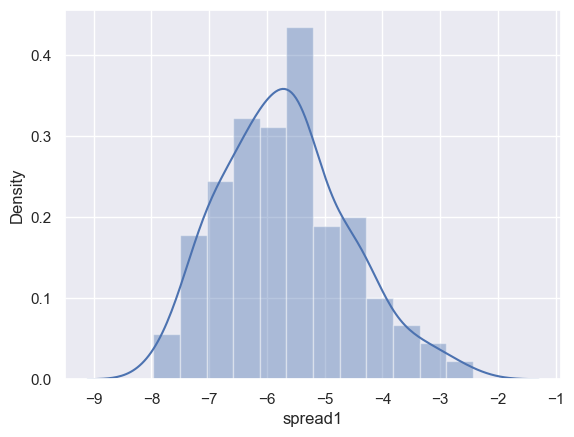

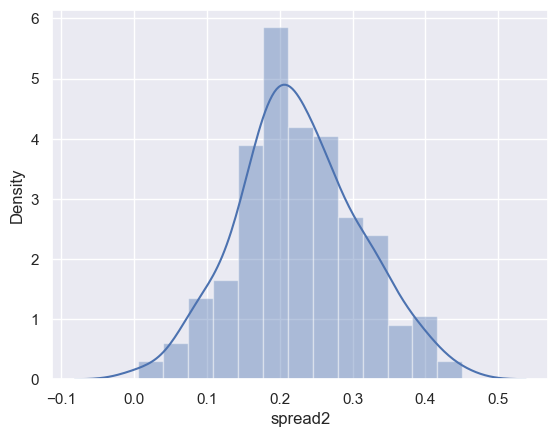

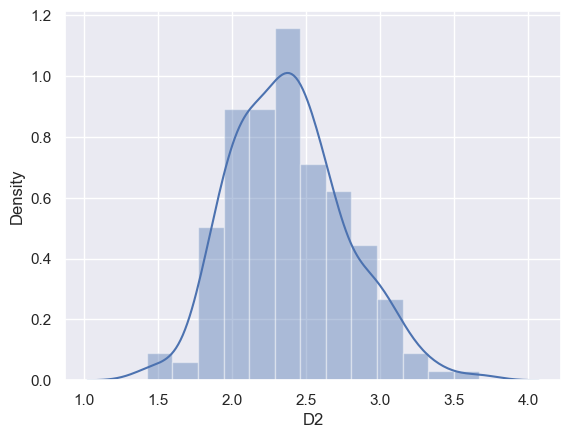

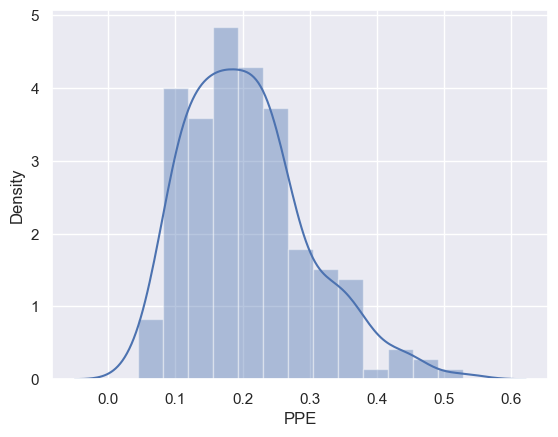

In [9]:
def distplot(col):
    sns.distplot(df[col])
    plt.show()
for i in list(df.columns)[1:]:
    distplot(i)

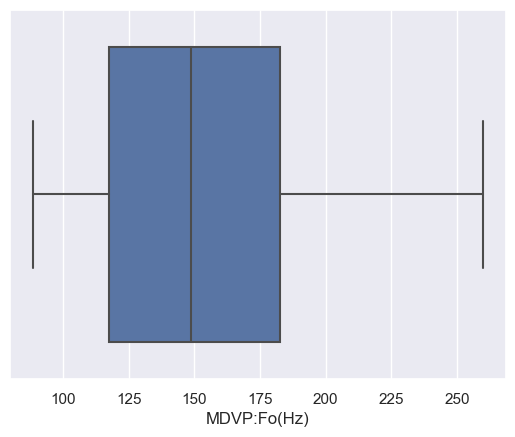

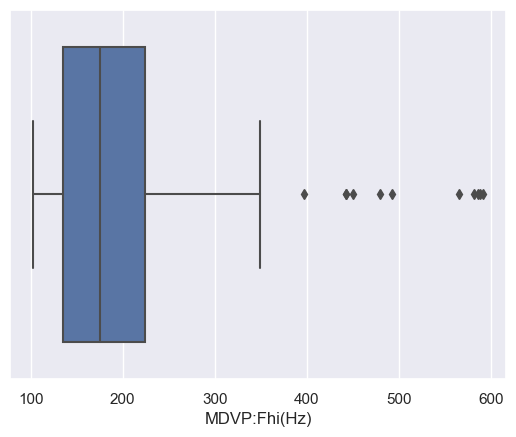

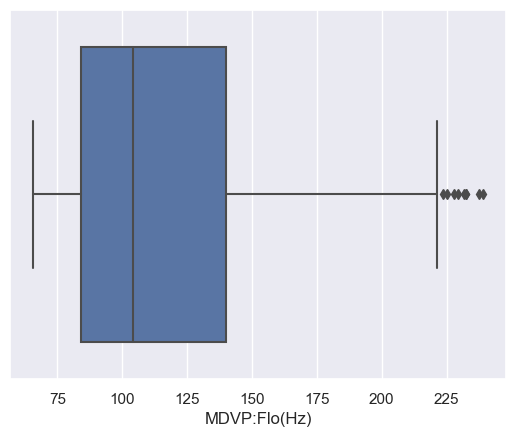

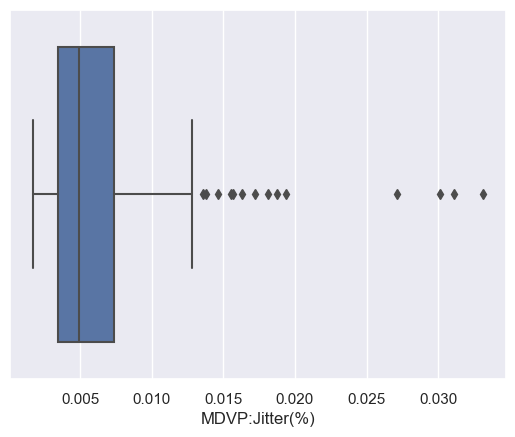

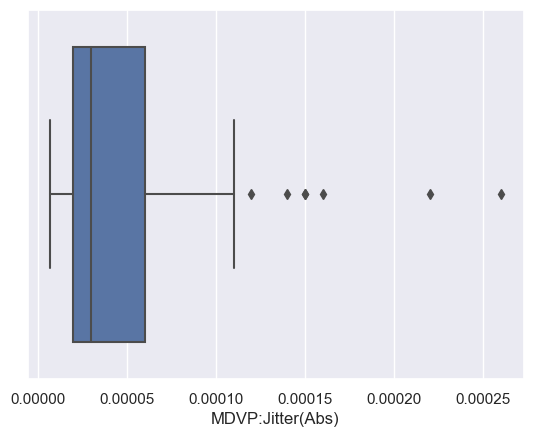

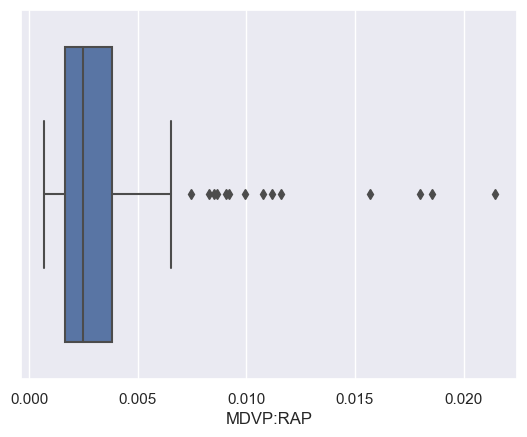

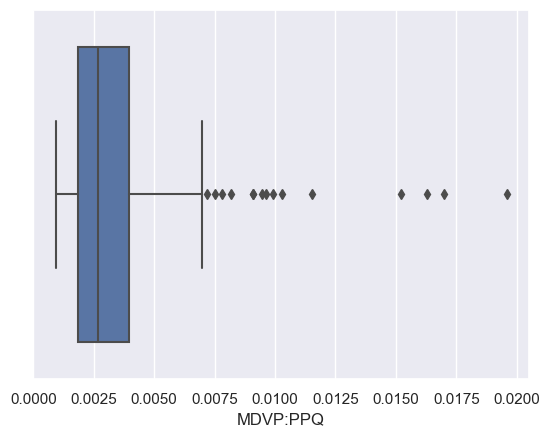

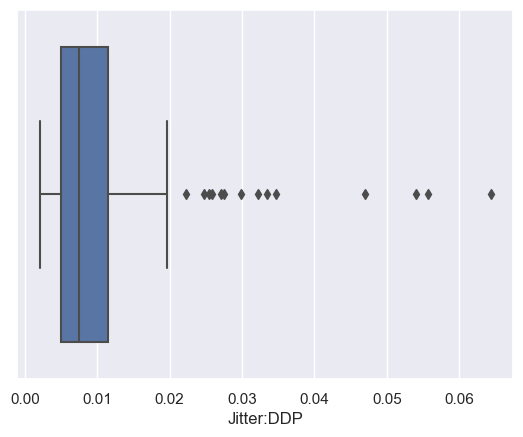

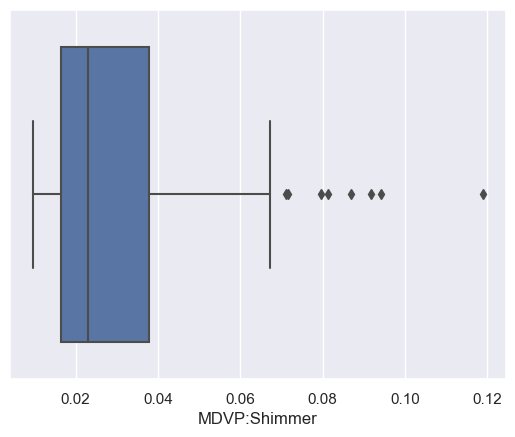

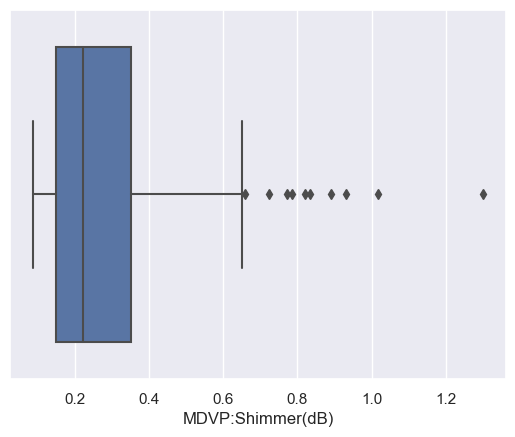

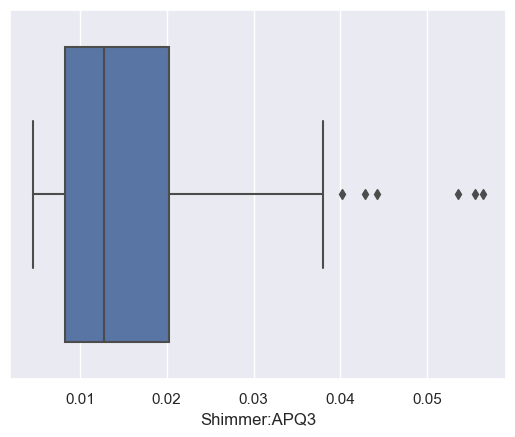

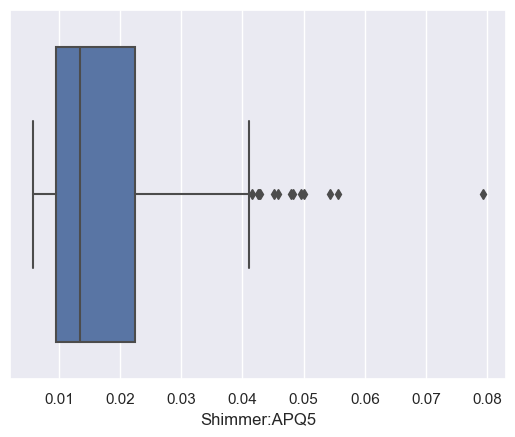

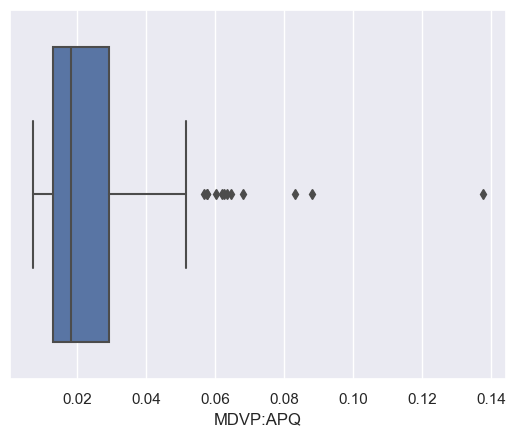

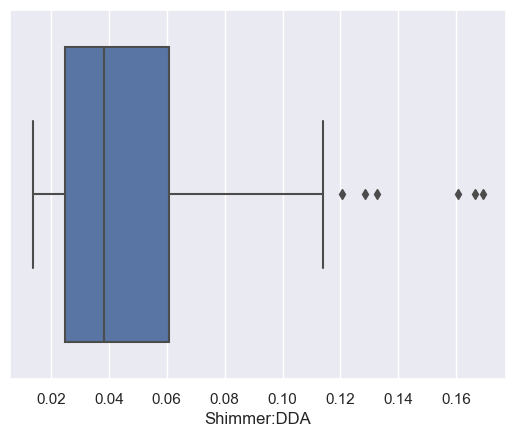

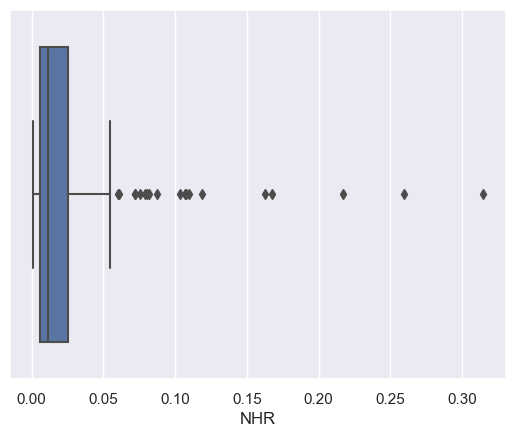

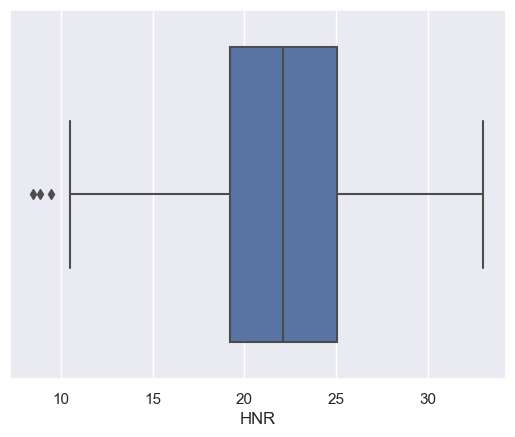

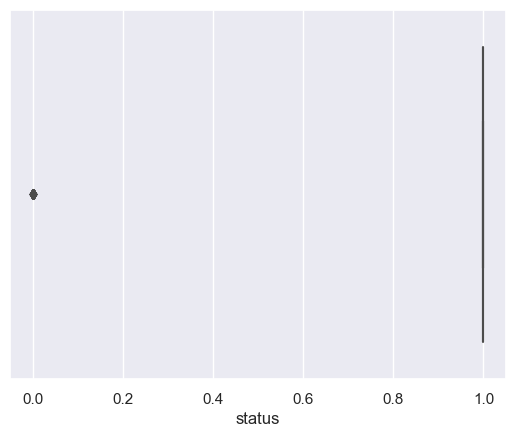

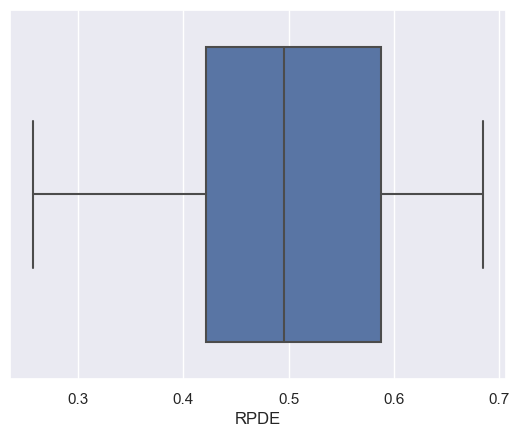

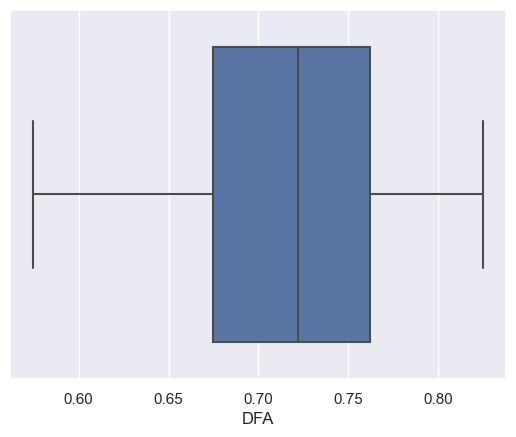

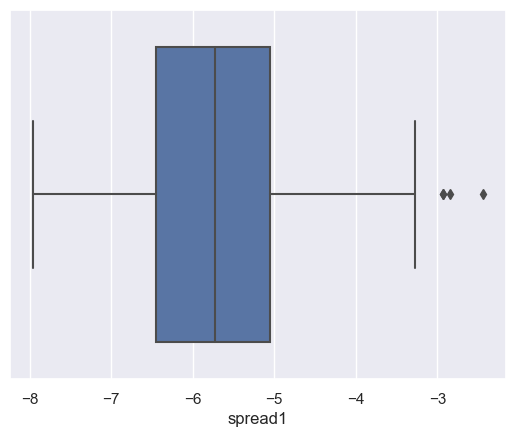

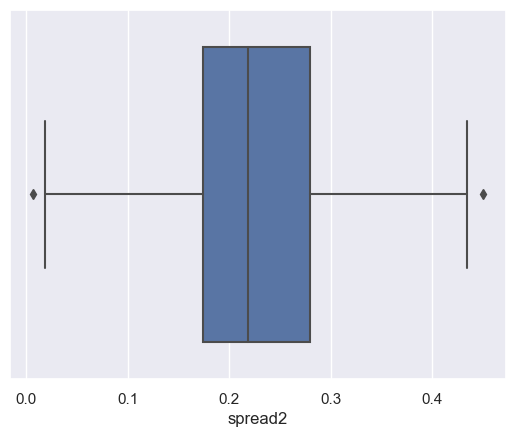

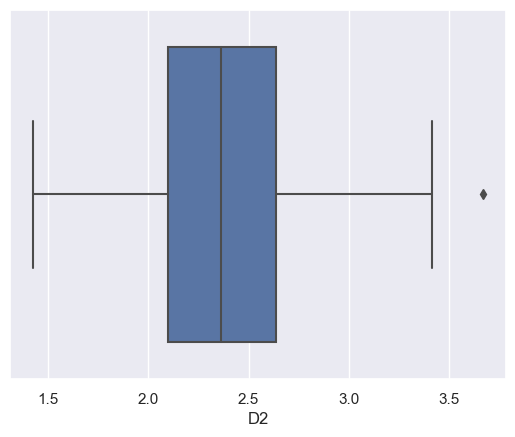

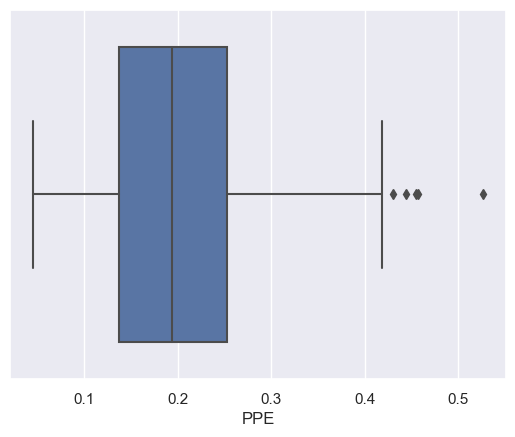

In [10]:
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
for i in list(df.columns)[1:]:
    boxplots(i)

<AxesSubplot:>

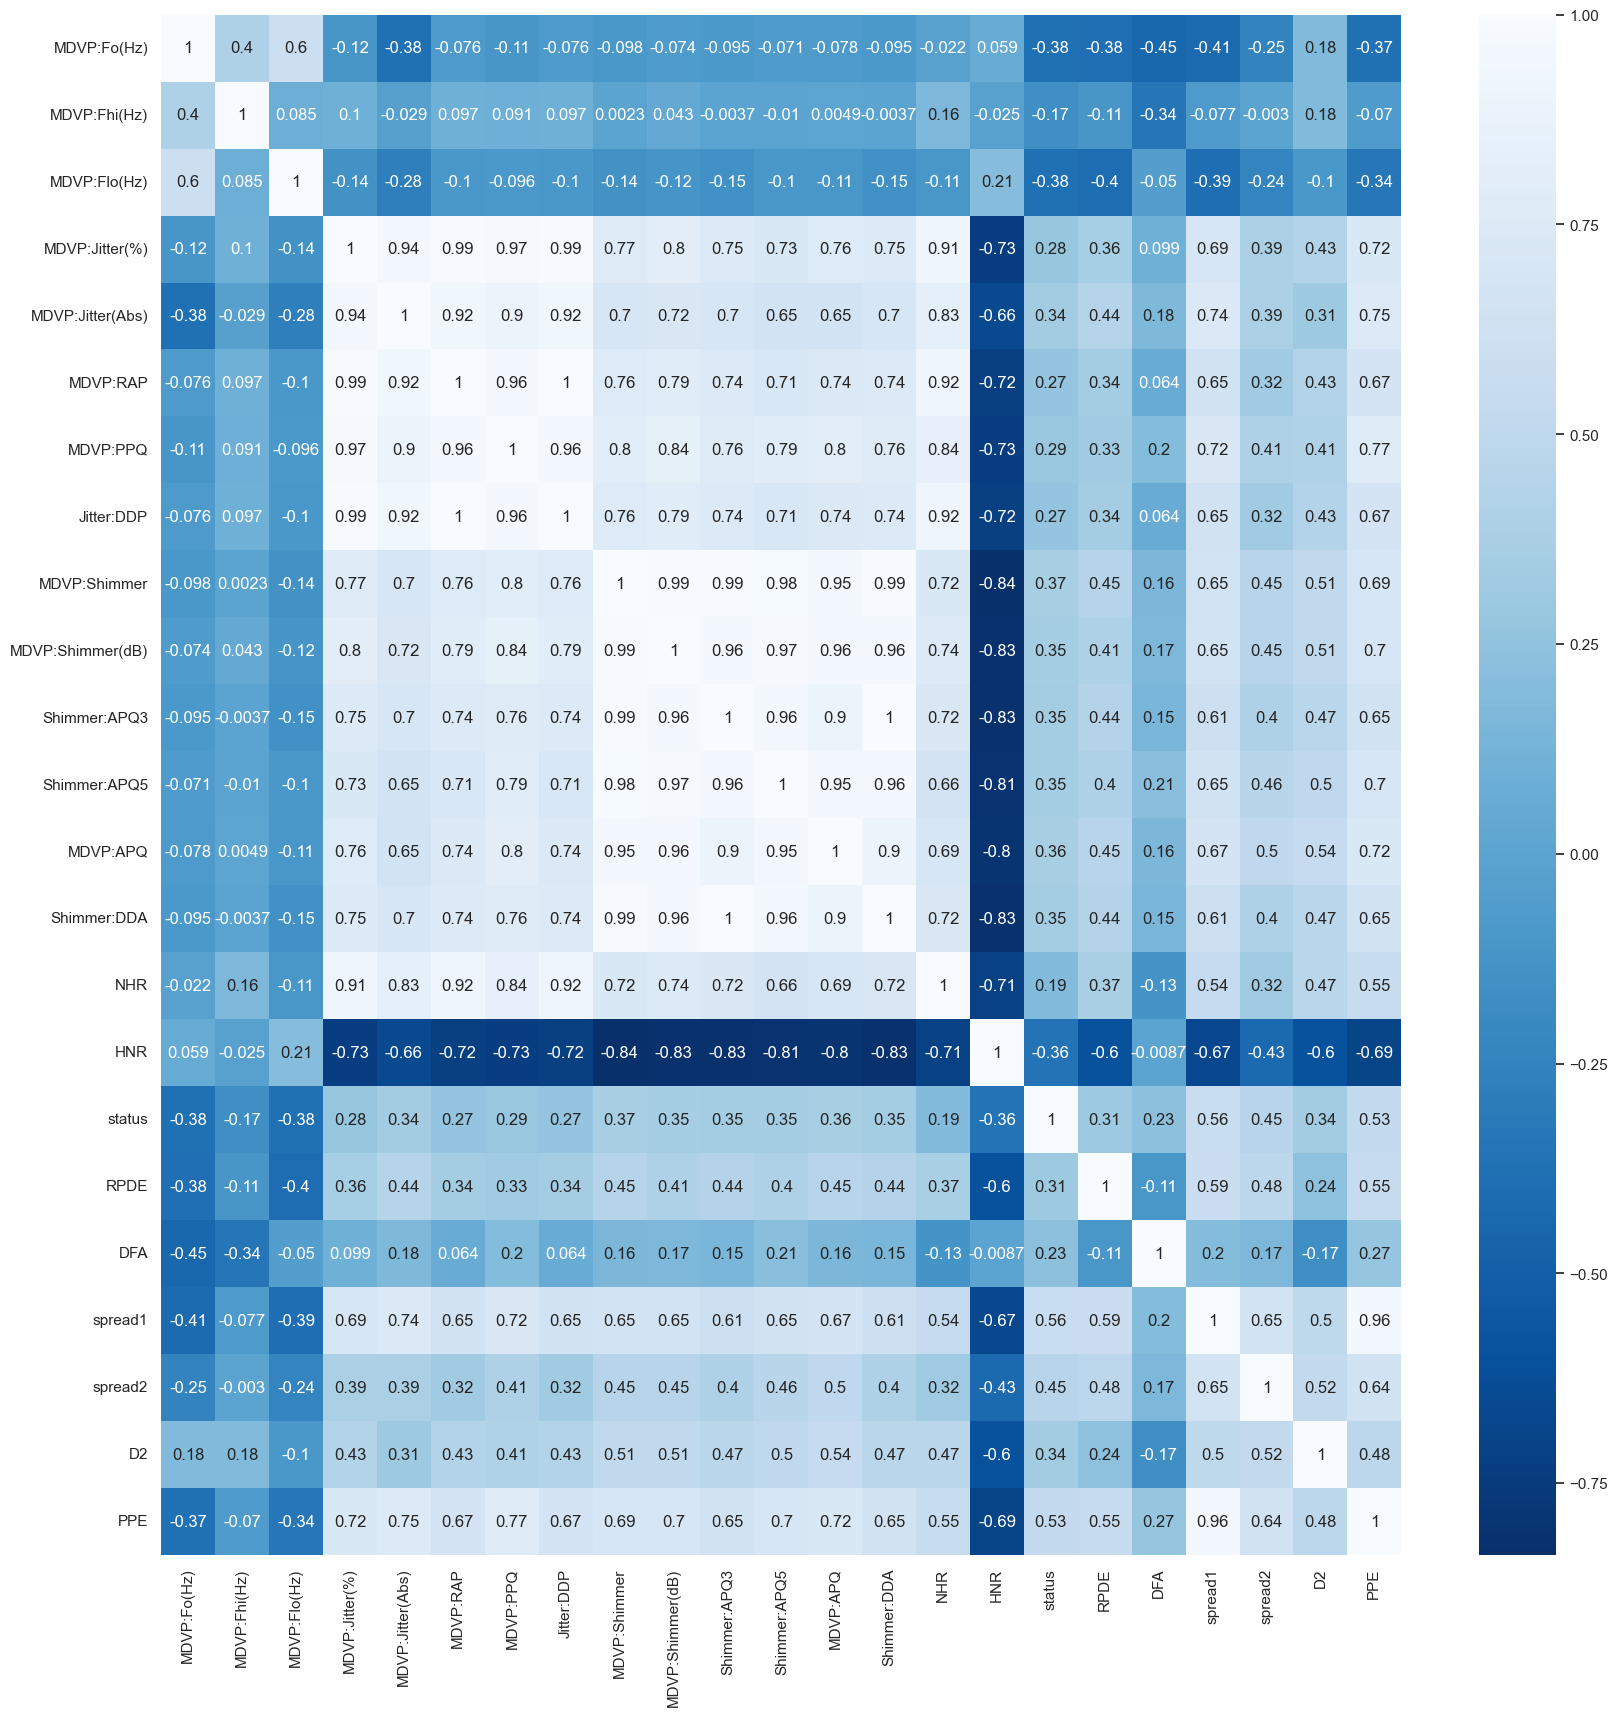

In [11]:
plt.figure(figsize=(20,20))
corr=df.corr()
sns.heatmap(corr, annot=True, cmap='Blues_r')

# PREPROCESSING

In [12]:
x=df.drop(['status','name'],axis=1)
y=df['status']

In [13]:
x.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [14]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [15]:

ros= RandomOverSampler()
x_ros, y_ros= ros.fit_resample(x,y)
print(y.value_counts())
print(y_ros.value_counts())

1    147
0     48
Name: status, dtype: int64
1    147
0    147
Name: status, dtype: int64


In [16]:
scaler=MinMaxScaler((-1,1))
x= scaler.fit_transform(x_ros)
y=y_ros

In [17]:
x.shape

(294, 22)

In [18]:
pca=PCA(.95)
x_pca= pca.fit_transform(x)
print(x.shape)
print(x_pca.shape)

(294, 22)
(294, 8)


In [19]:
pd.DataFrame(x_pca)

,0,1,2,3,4,5,6,7
0,1.190044,-0.469865,-0.730416,-0.614740,0.157868,-0.137721,0.110049,0.019230
1,1.982206,0.057341,-1.087020,-0.227911,0.262384,-0.310229,0.199621,0.191729
2,1.657256,-0.137227,-1.145252,-0.341106,0.194904,-0.037142,0.065106,0.041933
3,1.801182,-0.114508,-1.110009,-0.281866,0.307199,-0.133222,0.084728,0.123660
4,2.189431,0.162432,-1.273425,-0.538679,-0.054882,0.030069,-0.030659,0.355290
...,...,...,...,...,...,...,...,...
289,-1.300716,1.398378,0.011615,0.639294,-0.217642,0.050068,0.114589,-0.085514
290,-0.611023,0.498130,0.735461,-0.132651,-0.156476,-0.342273,0.088994,-0.288986
291,-0.098759,-0.802510,0.577028,0.388046,-0.298991,0.197170,-0.201749,0.326444
292,-0.974912,0.304795,0.268910,-0.684030,-0.129985,-0.202329,-0.161382,0.064467


In [20]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test= train_test_split(x_pca,y, test_size=0.3, random_state=1)

# MODEL BUILDING


In [21]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# LOGISTIC REGGRESION

In [22]:

from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(C=0.4, max_iter=1000, solver='liblinear')
lr=classifier.fit(x_train, y_train)

y_pred= classifier.predict(x_test)

accuracy_LR= accuracy_score(y_test, y_pred)
accuracy_LR



0.7752808988764045

# DECISION TREE CLASSIFIER

In [23]:
from sklearn.tree import DecisionTreeClassifier
classifier2= DecisionTreeClassifier(random_state=14)
dtree=classifier2.fit(x_train,y_train)

y_pred2= classifier2.predict(x_test)

accuracy_DT= accuracy_score(y_test,y_pred2)
accuracy_DT

0.9101123595505618

# RANDOM FOREST CLASSIFIER

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier3= RandomForestClassifier(max_depth=4, random_state=10)
rfi= classifier3.fit(x_train,y_train)

y_pred3=classifier3.predict(x_test)

accuracy_rf=accuracy_score(y_test,y_pred3)
accuracy_rf

0.9438202247191011

# SVC

In [25]:
from sklearn.svm import SVC
model_svm= SVC()
svm= model_svm.fit(x_train,y_train)

y_pred5=model_svm.predict(x_test)

accuracy_SVC= accuracy_score(y_test, y_pred5)
accuracy_SVC

0.9213483146067416

# K- NEAREST NEIGHBOUR

In [26]:
from sklearn.neighbors import KNeighborsClassifier
model_knn= KNeighborsClassifier()
knn=model_knn.fit(x_train, y_train)

pred_knn=model_knn.predict(x_test)

accuracy_knn= accuracy_score(y_test, pred_knn)
accuracy_knn

0.9775280898876404

# XGBoost

In [27]:
from xgboost import XGBClassifier
model_xgb= XGBClassifier()
model_xgb.fit(x_train, y_train)
y_pred_xgb=model_xgb.predict(x_test)
print(accuracy_score(y_test,y_pred_xgb))

0.9550561797752809


In [28]:
accuracy_xgb=accuracy_score(y_test,y_pred_xgb)

# VOTING CLASSIFIER

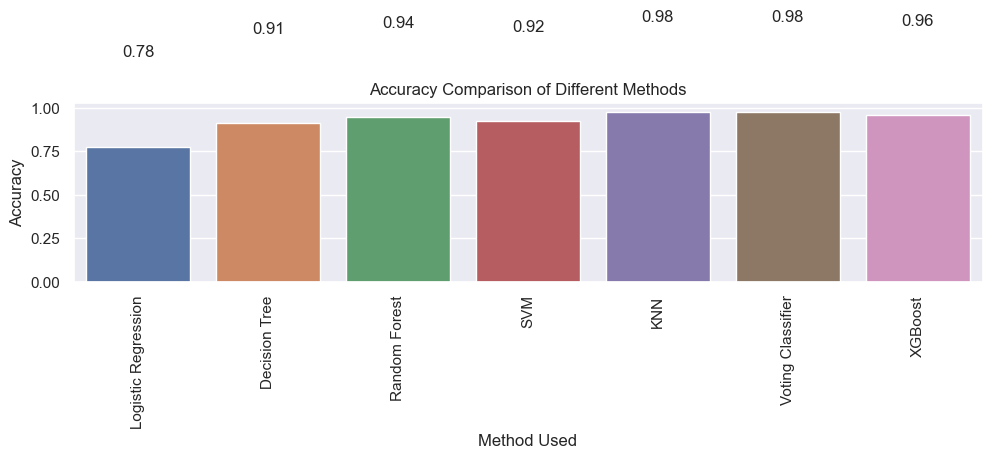

In [29]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
  
evc = VotingClassifier(estimators=[('lr', lr), ('DT', dtree), ('rfi', rfi), ('SVM', svm), 
                                    ('KNN', knn), ('XGB', model_xgb)], voting='hard', flatten_transform=True)

model_evc = evc.fit(x_train, y_train)

pred_evc = evc.predict(x_test)

accuracy_evc = accuracy_score(y_test, pred_evc)
list1 = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "KNN", "Voting Classifier", "XGBoost"]
list2 = [accuracy_LR, accuracy_DT, accuracy_rf, accuracy_SVC, accuracy_knn, accuracy_evc, accuracy_xgb]
df_accuracy = pd.DataFrame({'Method Used': list1, "Accuracy": list2})
plt.figure(figsize=(10, 6))
charts = sns.barplot(x="Method Used", y="Accuracy", data=df_accuracy)
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
for index, value in enumerate(df_accuracy['Accuracy']):
    charts.text(index, value + 0.5, f'{value:.2f}', ha='center', va='bottom')

plt.xlabel('Method Used')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Methods')
plt.tight_layout()
plt.show()


## METRIC EVALUATION

# KNN 

In [30]:
from sklearn.metrics import roc_curve, auc

In [31]:


classifier4 = RandomForestClassifier(criterion='entropy')

classifier4.fit(x_train, y_train)

y_pred4_train = classifier4.predict(x_train)
y_pred4_test = classifier4.predict(x_test)


model_knn = KNeighborsClassifier()

model_knn.fit(x_train, y_train)

pred_knn_train = model_knn.predict(x_train)
pred_knn_test = model_knn.predict(x_test)


In [32]:
print(confusion_matrix(y_train, y_pred4_train))

print(confusion_matrix(y_test,y_pred4_test))

[[104   0]
 [  0 101]]
[[43  0]
 [ 0 46]]


In [33]:
print(classification_report(y_train, y_pred4_train))

print(classification_report(y_test,y_pred4_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00       101

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        46

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89



In [34]:
print(confusion_matrix(y_train, pred_knn_train))

print(confusion_matrix(y_test,pred_knn_test))

[[102   2]
 [ 11  90]]
[[41  2]
 [ 0 46]]


In [35]:
print(classification_report(y_train, pred_knn_train))

print(classification_report(y_test,pred_knn_test))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       104
           1       0.98      0.89      0.93       101

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.96      1.00      0.98        46

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89



# XGBoost

In [36]:
y_pred_xgb=model_xgb.predict(x_test)
print(accuracy_score(y_test,y_pred_xgb))

0.9550561797752809


In [37]:

y_pred_train = model_xgb.predict(x_train)
y_pred_test = model_xgb.predict(x_test)

print("Confusion Matrix - Training Set:")
print(confusion_matrix(y_train, y_pred_train))
print("\nClassification Report - Training Set:")
print(classification_report(y_train, y_pred_train))

print("\nConfusion Matrix - Test Set:")
print(confusion_matrix(y_test, y_pred_test))
print("\nClassification Report - Test Set:")
print(classification_report(y_test, y_pred_test))


Confusion Matrix - Training Set:
[[104   0]
 [  0 101]]

Classification Report - Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00       101

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205


Confusion Matrix - Test Set:
[[41  2]
 [ 2 44]]

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.96      0.96      0.96        46

    accuracy                           0.96        89
   macro avg       0.96      0.96      0.96        89
weighted avg       0.96      0.96      0.96        89



# ROC AND AUC FOR RANDOM FOREST


In [38]:
from sklearn.model_selection import cross_val_score

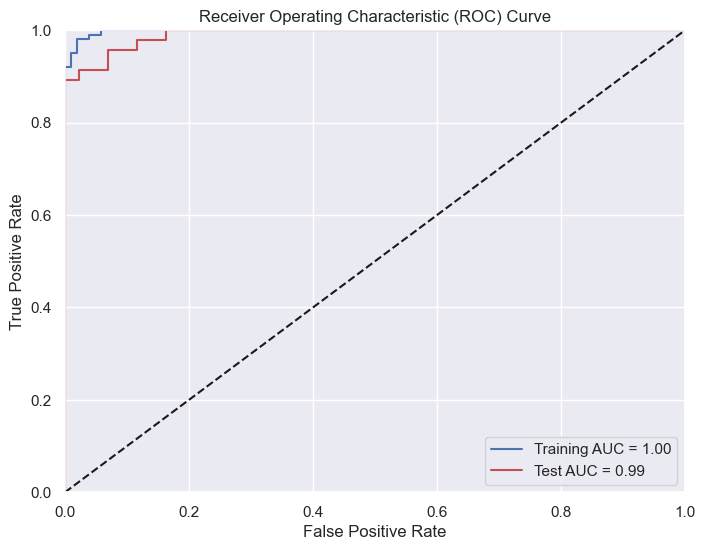

In [39]:
def plot_roc(rfi, x_train, y_train, x_test, y_test):
    train_probs = rfi.predict_proba(np.array(x_train))[:, 1]
    test_probs = rfi.predict_proba(np.array(x_test))[:, 1]
    
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_probs)
    roc_auc_train = auc(fpr_train, tpr_train)
    
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_probs)
    roc_auc_test = auc(fpr_test, tpr_test)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, 'b', label=f'Training AUC = {roc_auc_train:.2f}')
    plt.plot(fpr_test, tpr_test, 'r', label=f'Test AUC = {roc_auc_test:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

plot_roc(rfi, x_train, y_train, x_test, y_test)


# ROC AND AUC FOR XGBoost

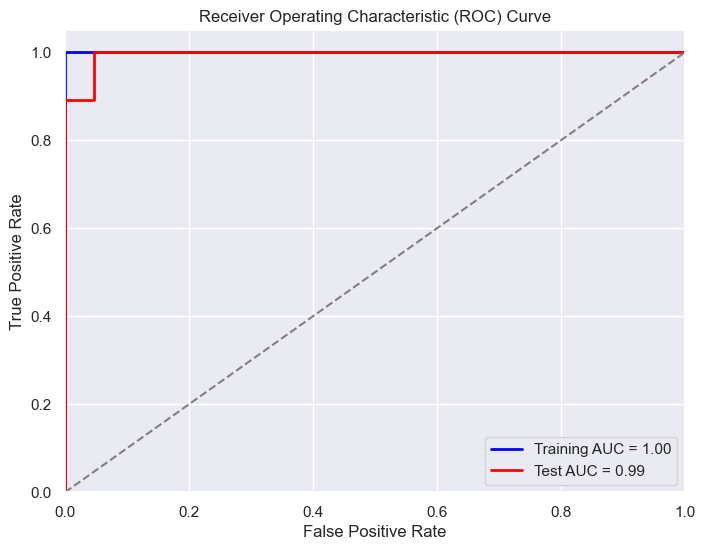

In [40]:


model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)

probs_train = model_xgb.predict_proba(x_train)[:, 1]
probs_test = model_xgb.predict_proba(x_test)[:, 1]

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, probs_train)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, probs_test)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training AUC = {roc_auc_train:.2f}')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test AUC = {roc_auc_test:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## ROC AND AUC FOR KNN

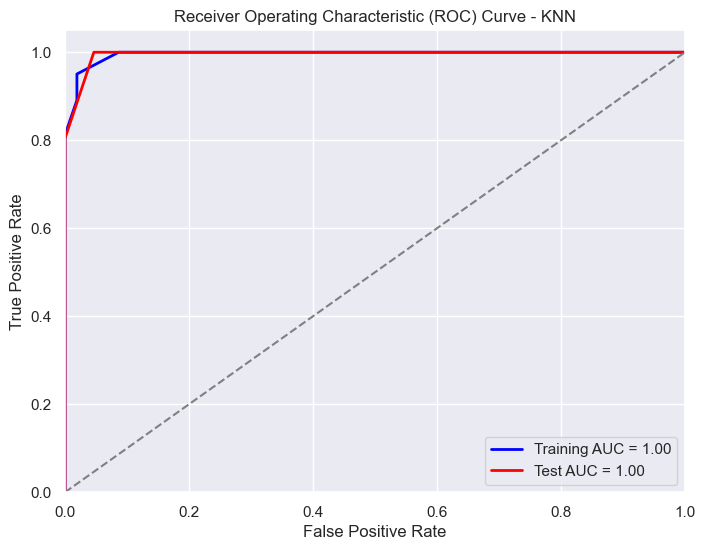

In [41]:
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)

probs_train_knn = model_knn.predict_proba(x_train)[:, 1]
probs_test_knn = model_knn.predict_proba(x_test)[:, 1]

fpr_train_knn, tpr_train_knn, thresholds_train_knn = roc_curve(y_train, probs_train_knn)
roc_auc_train_knn = auc(fpr_train_knn, tpr_train_knn)

fpr_test_knn, tpr_test_knn, thresholds_test_knn = roc_curve(y_test, probs_test_knn)
roc_auc_test_knn = auc(fpr_test_knn, tpr_test_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train_knn, tpr_train_knn, color='blue', lw=2, label=f'Training AUC = {roc_auc_train_knn:.2f}')
plt.plot(fpr_test_knn, tpr_test_knn, color='red', lw=2, label=f'Test AUC = {roc_auc_test_knn:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc='lower right')
plt.show()


# STACKING AND PREDICTION 

In [42]:
def predict_on_all_data(models, X, y):

    for index, row in X.iterrows():

        predictions = {model_name: model.predict(row.values.reshape(1, -1))[0]
                       for model_name, model in models.items()}

        print(f"Index: {index}, Label: {y.iloc[index]}")
        for model_name, pred in predictions.items():
            print(f"\t- Prediction by {model_name}: {pred}")
        print()  

df = pd.read_csv('parkinsons.txt')

X = df[['MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Shimmer',
        'NHR', 'HNR', 'RPDE', 'DFA']]
y = df['status']


knn = KNeighborsClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()


knn.fit(X, y)
rf.fit(X, y)
xgb.fit(X, y)

models = {'knn': knn, 'rf': rf, 'xgb': xgb}


predict_on_all_data(models, X, y)

new_data = {}
print("Enter the values for the following features:")
features = X.columns.tolist()
for feature in features:
    value = float(input(f"{feature}: "))
    new_data[feature] = [value]

new_data_df = pd.DataFrame(new_data)

pred_knn = knn.predict(new_data_df)
pred_rf = rf.predict(new_data_df)
pred_xgb = xgb.predict(new_data_df)

stacked_predictions = pd.DataFrame({'KNN': pred_knn,
                                    'RandomForest': pred_rf,
                                    'XGBoost': pred_xgb})

weights = {'KNN': 0.33, 'RandomForest': 0.33, 'XGBoost': 0.33}

if stacked_predictions.shape[1] == len(weights):

    final_pred = (stacked_predictions * pd.Series(weights)).sum(axis=1)

    if final_pred.iloc[0] >= 0.5:
        print("Prediction: Parkinson's Disease (1)")
    else:
        print("Prediction: No Parkinson's Disease (0)")
else:
    print("Error: Incompatible dimensions between stacked_predictions and weights.")



Index: 0, Label: 1
	- Prediction by knn: 1
	- Prediction by rf: 1
	- Prediction by xgb: 1

Index: 1, Label: 1
	- Prediction by knn: 1
	- Prediction by rf: 1
	- Prediction by xgb: 1

Index: 2, Label: 1
	- Prediction by knn: 1
	- Prediction by rf: 1
	- Prediction by xgb: 1

Index: 3, Label: 1
	- Prediction by knn: 1
	- Prediction by rf: 1
	- Prediction by xgb: 1

Index: 4, Label: 1
	- Prediction by knn: 1
	- Prediction by rf: 1
	- Prediction by xgb: 1

Index: 5, Label: 1
	- Prediction by knn: 1
	- Prediction by rf: 1
	- Prediction by xgb: 1

Index: 6, Label: 1
	- Prediction by knn: 1
	- Prediction by rf: 1
	- Prediction by xgb: 1

Index: 7, Label: 1
	- Prediction by knn: 1
	- Prediction by rf: 1
	- Prediction by xgb: 1

Index: 8, Label: 1
	- Prediction by knn: 1
	- Prediction by rf: 1
	- Prediction by xgb: 1

Index: 9, Label: 1
	- Prediction by knn: 1
	- Prediction by rf: 1
	- Prediction by xgb: 1

Index: 10, Label: 1
	- Prediction by knn: 1
	- Prediction by rf: 1
	- Prediction by xgb: 1

In [43]:
print(df.iloc[[65],[1,3,4,9,15,16,17,18,19]])

    MDVP:Fo(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Shimmer     NHR     HNR  status      RPDE       DFA
65      228.969       113.201         0.00238       0.01745  0.0042  24.547       0  0.305429  0.681811


# ACCURACY OF STACKED MODEL

In [44]:

model_xgb.fit(x_train, y_train)

rf = RandomForestClassifier()
knn = KNeighborsClassifier()

rf.fit(x_train, y_train)
knn.fit(x_train, y_train)

pred_rf = rf.predict(x_test)
pred_knn = knn.predict(x_test)
pred_xgb = model_xgb.predict(x_test)

stacked_predictions = pd.DataFrame({'RandomForest': pred_rf,
                                    'KNN': pred_knn,
                                    'XGBoost': pred_xgb})

final_classifier = RandomForestClassifier()
final_classifier.fit(stacked_predictions, y_test)

final_pred = final_classifier.predict(stacked_predictions)

accuracy_stacked = accuracy_score(y_test, final_pred)

print("Accuracy of Stacked Model:", accuracy_stacked)



Accuracy of Stacked Model: 0.9887640449438202


## CROSS VALIDATION FOR STACKING

In [45]:
from sklearn.model_selection import StratifiedKFold


pred_rf = rf.predict(x_test)
pred_knn = knn.predict(x_test)
pred_xgb = model_xgb.predict(x_test)

stacked_predictions = pd.DataFrame({'RandomForest': pred_rf,
                                    'KNN': pred_knn,
                                    'XGBoost': pred_xgb})

final_classifier = RandomForestClassifier()

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []

for fold_idx, (train_index, test_index) in enumerate(kf.split(stacked_predictions, y_test), 1):
    X_train_cv, X_test_cv = stacked_predictions.iloc[train_index], stacked_predictions.iloc[test_index]
    y_train_cv, y_test_cv = y_test.iloc[train_index], y_test.iloc[test_index]
    
    final_classifier.fit(X_train_cv, y_train_cv)
    final_pred_cv = final_classifier.predict(X_test_cv)
    
    accuracy_cv = accuracy_score(y_test_cv, final_pred_cv)
    accuracy_scores.append(accuracy_cv)
    
    print(f"Fold {fold_idx}: Accuracy = {accuracy_cv:.4f}")

mean_accuracy_cv = np.mean(accuracy_scores)
print("\nMean Cross-Validation Accuracy of Stacked Model:", mean_accuracy_cv)


Fold 1: Accuracy = 0.9444
Fold 2: Accuracy = 1.0000
Fold 3: Accuracy = 0.9444
Fold 4: Accuracy = 1.0000
Fold 5: Accuracy = 1.0000

Mean Cross-Validation Accuracy of Stacked Model: 0.9777777777777779


## CROSS VALIDATION FOR VOTING CLASIFIER

In [46]:


clf_rf = RandomForestClassifier()
clf_xgb = XGBClassifier()
clf_knn = KNeighborsClassifier()

estimators = [('rf', clf_rf), ('xgb', clf_xgb), ('knn', clf_knn)]

voting_clf = VotingClassifier(estimators, voting='soft')

cv_scores_voting = cross_val_score(voting_clf, x_train, y_train, cv=5)

print("Cross-Validation Scores for Voting Classifier:", cv_scores_voting)
print("Mean CV Score:", cv_scores_voting.mean())


Cross-Validation Scores for Voting Classifier: [0.90243902 0.97560976 0.90243902 0.90243902 0.90243902]
Mean CV Score: 0.9170731707317072
